In [3]:
import torch

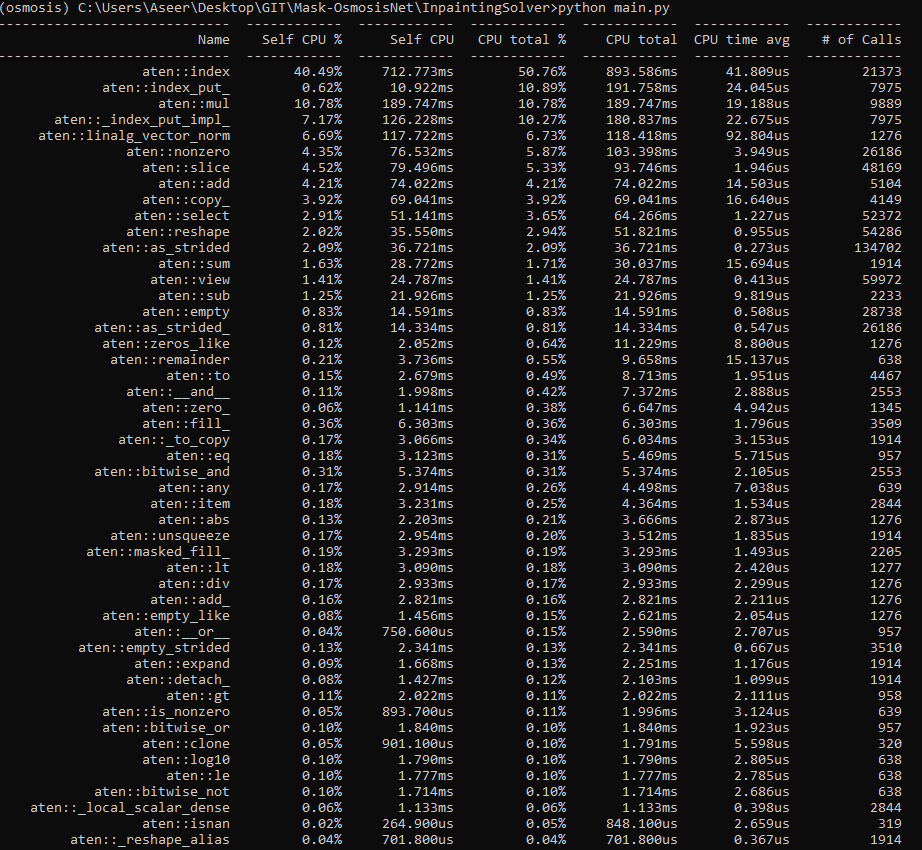

In [5]:
import torch

x = torch.randn((16))
print(x)
x[[0,1,2]] = 0
print(x)

tensor([-1.6921, -1.3269, -2.1484,  1.7345,  1.0037,  0.2097, -0.5633,  0.9847,
        -0.0064, -0.0136, -0.9222, -0.3662,  0.1060,  0.1186,  1.3649, -1.0366])
tensor([ 0.0000,  0.0000,  0.0000,  1.7345,  1.0037,  0.2097, -0.5633,  0.9847,
        -0.0064, -0.0136, -0.9222, -0.3662,  0.1060,  0.1186,  1.3649, -1.0366])


torch Diagonal and non diagonal matrix

In [33]:
import torch

x = torch.randn((2, 1, 4, 4))

diag_mat = torch.diag(torch.ones(x.shape[-1]))
lu_diag_mat = torch.ones(x.shape[-1]) - diag_mat


print(x)
print(diag_mat[None, None, :, :] * x)
print(lu_diag_mat[None, None, :, :] * x)

tensor([[[[ 1.1068,  2.1398,  0.5861, -0.5115],
          [-0.1982,  1.1930,  0.1893, -0.6984],
          [ 0.4387,  0.9895, -0.2361, -2.0643],
          [-0.2697,  0.8714, -2.3487,  1.0233]]],


        [[[ 0.8424,  0.1728, -0.4780, -1.7035],
          [ 0.7704,  1.0987, -0.2732,  0.1427],
          [ 0.4480, -1.7469, -0.4018,  0.4347],
          [-0.6608,  1.5002, -0.0662,  0.7805]]]])
tensor([[[[ 1.1068,  0.0000,  0.0000, -0.0000],
          [-0.0000,  1.1930,  0.0000, -0.0000],
          [ 0.0000,  0.0000, -0.2361, -0.0000],
          [-0.0000,  0.0000, -0.0000,  1.0233]]],


        [[[ 0.8424,  0.0000, -0.0000, -0.0000],
          [ 0.0000,  1.0987, -0.0000,  0.0000],
          [ 0.0000, -0.0000, -0.4018,  0.0000],
          [-0.0000,  0.0000, -0.0000,  0.7805]]]])
tensor([[[[ 0.0000,  2.1398,  0.5861, -0.5115],
          [-0.1982,  0.0000,  0.1893, -0.6984],
          [ 0.4387,  0.9895, -0.0000, -2.0643],
          [-0.2697,  0.8714, -2.3487,  0.0000]]],


        [[[ 0.0000,  0

F.pad

In [10]:
import torch
import torch.nn.functional as F

x = torch.randn((12, 12, 4, 4))
print(x.shape)
# apply reflection padding to x
x_pad = F.pad(x, (1, 1, 1, 1), mode='replicate')
print(x_pad.shape)

print(x[0, 0, :, :])
print(x_pad[0, 0, :, :])

torch.Size([12, 12, 4, 4])
torch.Size([12, 12, 6, 6])
tensor([[ 0.2437,  1.6253,  0.3732, -0.5653],
        [-0.5034,  0.2123,  1.6033,  0.9063],
        [-0.2780,  0.5639,  1.4355, -1.0260],
        [ 0.5117, -0.3526, -0.0376,  0.5712]])
tensor([[ 0.2437,  0.2437,  1.6253,  0.3732, -0.5653, -0.5653],
        [ 0.2437,  0.2437,  1.6253,  0.3732, -0.5653, -0.5653],
        [-0.5034, -0.5034,  0.2123,  1.6033,  0.9063,  0.9063],
        [-0.2780, -0.2780,  0.5639,  1.4355, -1.0260, -1.0260],
        [ 0.5117,  0.5117, -0.3526, -0.0376,  0.5712,  0.5712],
        [ 0.5117,  0.5117, -0.3526, -0.0376,  0.5712,  0.5712]])


0.0006065761532401028


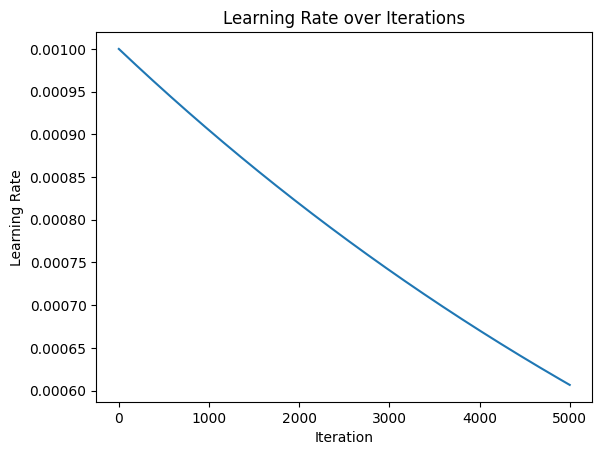

In [3]:
import torch

# use the exponentialLR of the torch.optim.lr_scheduler and plot the learning rate over time for a few epochs

import matplotlib.pyplot as plt 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.optim.lr_scheduler import ExponentialLR

# create a simple model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# create a simple dataset
X = torch.randn(200, 10)
y = torch.randn(200, 1)

# create a simple dataloader
dataset = torch.utils.data.TensorDataset(X, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

# create a simple model
model = Net()

# create a simple optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

# create a simple learning rate scheduler
scheduler = ExponentialLR(optimizer, gamma=0.9999)

# train the model
lrs = []
for epoch in range(100):
    for i, data in enumerate(dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = F.mse_loss(outputs, labels)
        # loss.backward()
        # optimizer.step()
        lrs.append(optimizer.param_groups[0]['lr'])
        scheduler.step()

print(lrs[-1])
plt.plot(lrs)
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Iterations')
plt.show()



Time based decay

9.174311926605505e-05


Text(0.5, 1.0, 'Learning rate decay')

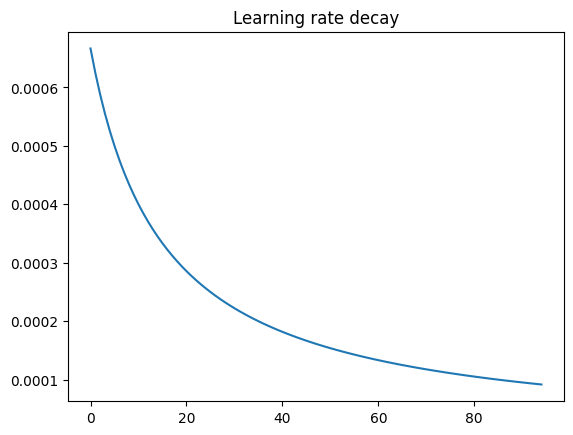

In [18]:
import matplotlib.pyplot as plt

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)


slr = 0.001
decay = 0.1
iter = 100

# plot the learning rate decay
lrs = []
for i in range(5, iter):
    lrs.append(lr_time_based_decay(i, slr))


print(lrs[-1])
plt.plot(lrs)
plt.title('Learning rate decay')


In [1]:
class OffsetEvolve():
    def __init__(self, init_offset, final_offset, max_iter):
        self.init_offset = init_offset
        self.final_offset = final_offset
        self.max_iter = max_iter

    def __call__(self, iter):
        if iter < self.max_iter:
            offset = self.init_offset + (self.final_offset - self.init_offset) * iter / self.max_iter
            return offset
        else:
            return self.final_offset
        
offset_evolve = OffsetEvolve(1, 0.09, 20000)
print(offset_evolve(0))

1.0


In [3]:
import torch

def calculate_metrics(input_tensor, target_tensor, max_pixel_value=1.0):
    mse_per_batch = torch.mean((input_tensor - target_tensor) ** 2, dim=(1, 2, 3))
    psnr_per_batch = 10 * torch.log10((max_pixel_value ** 2) / (mse_per_batch + 1e-8))
    return mse_per_batch, psnr_per_batch

u = torch.rand((8, 2, 10, 10))
v = torch.rand((8, 2, 10, 10))

m, p = calculate_metrics(u, v)
print(m)
print(p)

tensor([0.1447, 0.1697, 0.1506, 0.1769, 0.1440, 0.1647, 0.1723, 0.1709])
tensor([8.3958, 7.7019, 8.2203, 7.5219, 8.4151, 7.8340, 7.6374, 7.6729])


In [ ]:
import torch

def scaleDensity(inp):
    b, c, h, w = inp.shape
    hw = h*w
    tar_den = 0.1
    curr_den = torch.norm(inp, p = 1, dim = (2, 3)).view(b, c, 1, 1) / (hw)
    return torch.where(curr_den > tar_den, inp / (curr_den + 1e-8) * tar_den, inp)

u = torch.rand((1, 2, 10, 10))
u_scaled = scaleDensity(u)
print(u)
print(u_scaled)

Generate Random mask    

In [2]:
import torch
from PIL import Image

mask = (torch.rand((128, 128)) < 0.1).float()

mask_image = Image.fromarray((mask.cpu().numpy() * 255).astype("uint8"))
mask_image.save('mask_128_10.jpg', "JPEG")

In [26]:
import torch 
import torch.nn.functional as F
from torchvision.transforms import Pad

def fun1(u, v, mask):
    '''
    u,v are not padded
    '''
    b, c, h, w = u.shape
    pad = Pad(1, padding_mode = "symmetric")
    u   = pad(u)
    v   = pad(v)

    
    # laplacian kernel
    lap_u_kernel = torch.tensor([[[[0., 1., 0.],
                                   [1.,-4., 1.],
                                   [0., 1., 0.]]]])
    lap_u = F.conv2d(u, lap_u_kernel)

    # row-direction filters  
    f1 = torch.tensor([[[[-1.], [1.]]]])
    f2 = torch.tensor([[[[.5], [.5]]]])
    d1_u = (F.conv2d(v, f1, padding='same') / F.conv2d(v, f2, padding='same')) * F.conv2d(u, f2, padding='same')
    dx_d1_u = d1_u[:, :, 1:-1, 1:-1] - d1_u[:, :, :-2, 1:-1]

    # col-direction filters
    f3 = torch.tensor([[[[-1., 1.]]]])
    f4 = torch.tensor([[[[.5, .5]]]])
    d2_u = (F.conv2d(v, f3, padding='same') / F.conv2d(v, f4, padding='same')) * F.conv2d(u, f4, padding='same')
    dy_d2_u = d2_u[:, :, 1:-1, 1:-1] - d2_u[:, :, 1:-1, :-2]

    return torch.mean(torch.norm(lap_u - dx_d1_u - dy_d2_u, p = 2, dim = (2, 3)) / h*w)


u = torch.randn((1, 1, 64, 64))
v = torch.randn((1, 1, 64, 64))
fun1(u, u, None)

tensor(1.5518e-05)

In [4]:
# Define a custom hook function that captures the variable name
def create_backward_hook(var_name):
    def hook(grad):
        print(f"Gradient of {var_name}: {grad}")
    return hook

# Example tensors
a = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
b = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)

# Register hooks with variable names
a.register_hook(create_backward_hook("a"))
b.register_hook(create_backward_hook("b"))

# Perform some operations
c = a * b
loss = c.sum()

# Backpropagate
loss.backward()

Gradient of a: tensor([4., 5., 6.])
Gradient of b: tensor([1., 2., 3.])


In [1]:
import torch
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
st = time.time()
x = torch.randn((6400, 128), dtype=torch.float64, device =device)
y = torch.randn((6400, 128), dtype=torch.float64, device =device)
torch.mul(x,y)
et = time.time()

print(f"total time : {et-st}")

total time : 1.4106156826019287


In [2]:
st = time.time()
x = torch.randn((6400, 128), dtype=torch.float64, device =device)
y = torch.randn((128, 6400), dtype=torch.float64, device =device)
torch.matmul(x,y)
et = time.time()

print(f"total time : {et-st}")

OutOfMemoryError: CUDA out of memory. Tried to allocate 30.52 GiB. GPU 0 has a total capacity of 12.00 GiB of which 10.40 GiB is free. Of the allocated memory 125.00 MiB is allocated by PyTorch, and 3.00 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

addingh new dimention

In [7]:
import torch

x = torch.randn((6400, 128))
print(x.shape)
print(x[:, :, None, None].shape)

torch.Size([6400, 128])
torch.Size([6400, 128, 1, 1])


index select backward check

In [8]:
import torch

x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x + 2  # y is a new tensor

@torch.compile
def fun1(y):
    # In-place modification (affects the computation graph)
    y.add_(5)  # Modifying `y` in place
    loss = y.sum()
    return loss

with torch.autograd.set_detect_anomaly(True):
    loss = fun1(y)
    loss.backward()

KeyboardInterrupt: 

In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
def f_test():
    x = torch.randn((6400, 128, 128), dtype=torch.float32, device =device)
    y = torch.randn((6400, 128, 128), dtype=torch.float32, device =device)

    z = torch.mul(x, y)

def f_test1():
    x = torch.randn((6400, 1, 128, 128), dtype=torch.float32, device =device)
    y = torch.randn((6400, 1, 128, 128), dtype=torch.float32, device =device)

    z = torch.mul(x, y)

def d_test():
    x = torch.randn((6400,1, 128, 128), dtype=torch.float64, device =device)
    y = torch.randn((6400,1, 128, 128), dtype=torch.float64, device =device)

    z = torch.mul(x, y)


def d_test1():
    x = torch.randn((6400, 128, 128), dtype=torch.float64, device =device)
    y = torch.randn((6400, 128, 128), dtype=torch.float64, device =device)

    z = torch.mul(x, y)


In [5]:
import time

st = time.time()
for i in range(1000):
    f_test1()
et = time.time()
print(f"total time : {et-st}")


total time : 4.358606815338135


In [6]:
import time

st = time.time()
for i in range(1000):
    f_test()
et = time.time()
print(f"total time : {et-st}")

total time : 4.353766202926636


In [ ]:
st = time.time()
for i in range(1000):
    f_test()
et = time.time()
print(f"total time : {et-st}")

st = time.time()
for i in range(1000):
    f_test1()
et = time.time()
print(f"total time : {et-st}")


In [1]:
import torch 

x = torch.randn((3,1, 2, 2), dtype=torch.float64)
for i in x:
    print(i.squeeze(0))


tensor([[ 1.4377,  2.4451],
        [-0.4532,  1.8022]], dtype=torch.float64)
tensor([[-0.9816,  1.1198],
        [ 0.1560,  0.6123]], dtype=torch.float64)
tensor([[ 1.2612,  0.7868],
        [-1.0193,  2.4800]], dtype=torch.float64)


Mask slicing vs  torch.where

In [8]:
import torch
import time

# Create a larger tensor for a more noticeable difference
image = torch.arange(1, 10000000)  # Tensor from 1 to 1,000,000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
image = torch.tensor(image, device = device)
# torch.where approach
mask = image > 5000


start_time = time.time()
n_image = torch.where(mask, torch.tensor(10), image)
n_image = torch.where(~mask, torch.tensor(1), image)
n_image = torch.where(mask, torch.tensor(10), image)
end_time = time.time()
print(f"torch.where took: {end_time - start_time:.6f} seconds")

# image = torch.arange(1, 1000001)  # Reset tensor
start_time = time.time()
image[mask] = 10
image[~mask] = 1
image[mask] = 10
end_time = time.time()
print(f"Boolean indexing took: {end_time - start_time:.6f} seconds")


# image = torch.arange(1, 1000001)  # Reset tensor
start_time = time.time()
image = image.clone()
image[mask] = 10
image[~mask] = 1
image[mask] = 10
end_time = time.time()
print(f"Boolean indexing with clone: {end_time - start_time:.6f} seconds")




cpu


/tmp/ipykernel_93447/2585417404.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, device = device)


torch.where took: 0.461090 seconds
Boolean indexing took: 0.067715 seconds


In [23]:
import math
math.log10(8.770187e+04) - math.log10(7.0000e+04) 

0.09791081358009457

In [4]:
import torch

x, y = torch.randn((12, 11)), torch.randn((12, 11), dtype=torch.float64)

pad_mirror = Pad(1, padding_mode = "symmetric")
inp        = pad_mirror(inp[:, :, 1:self.nx+1, 1:self.ny+1])


tensor(-8.8435, dtype=torch.float64)
tensor(-8.8435, dtype=torch.float64)


B, C -> H, W

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

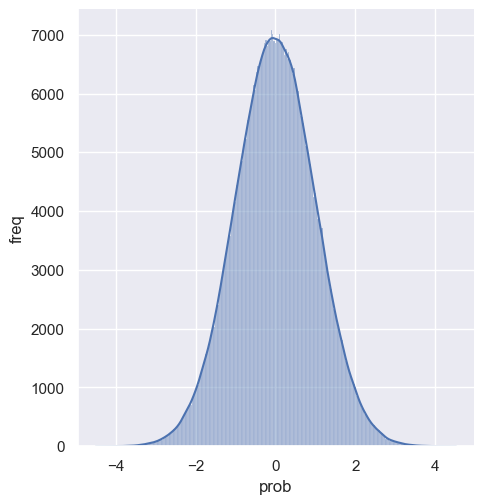

In [2]:

x = torch.randn((32, 1, 128, 128))
y = x.reshape(-1)
counts, bins = torch.histogram(y)

plot = sns.displot(y, kde=True)
fig = plot.figure
plot.set(xlabel='prob', ylabel='freq')
fig.savefig("test.png") 


B, C -> H, W

In [9]:
x = torch.randn((12, 1, 3,4))
B, C, H, W = x.shape

x.view(12*3, 4).shape

torch.Size([36, 4])

stacking images


B, C -> H, W

In [5]:
x = torch.randn((1, 1, 256, 246))
y = torch.randn((1, 1, 256, 246))

z = torch.cat((x, y), dim = 0)
z.shape


torch.Size([2, 1, 256, 246])

Scaling Density

In [27]:
import torch
pre_c = torch.special.expit(torch.randn((1, 1, 21, 20))) # non binary [0,1]
density = torch.sum(pre_c, dim = (2, 3))/(21*20)
c = torch.floor(pre_c + 0.5 ) # binary
density


tensor([[0.5036]])

In [28]:
den = 0.2
c_hat = (den * pre_c) / ( (torch.norm(pre_c, p = 1, dim = (2, 3)).view(1, 1, 1, 1)) / (21*20) + 1e-9)

torch.sum(c_hat, dim = (2, 3))/(21*20)

tensor([[0.2000]])

In [29]:
c = torch.floor(c_hat + 0.5 ) # binary
density = torch.sum(c, dim = (2, 3))/(21*20)
density

tensor([[0.]])

In [12]:
c_hat

tensor([[[[0.1671, 0.0945, 0.1175,  ..., 0.2439, 0.1102, 0.3603],
          [0.3002, 0.1330, 0.2906,  ..., 0.2484, 0.1437, 0.3260],
          [0.0642, 0.1387, 0.2422,  ..., 0.2904, 0.1491, 0.2334],
          ...,
          [0.0470, 0.3572, 0.2343,  ..., 0.2149, 0.1691, 0.2075],
          [0.2102, 0.1402, 0.1963,  ..., 0.3060, 0.1318, 0.1813],
          [0.2577, 0.3188, 0.1973,  ..., 0.2464, 0.1369, 0.2776]],

         [[0.2560, 0.2944, 0.2829,  ..., 0.1436, 0.2973, 0.3630],
          [0.1711, 0.0823, 0.2687,  ..., 0.1957, 0.2335, 0.1281],
          [0.1641, 0.2821, 0.1659,  ..., 0.2409, 0.1260, 0.2215],
          ...,
          [0.1470, 0.1442, 0.0954,  ..., 0.2907, 0.2427, 0.2491],
          [0.3073, 0.2849, 0.2088,  ..., 0.0791, 0.1428, 0.2163],
          [0.2792, 0.1700, 0.0882,  ..., 0.1136, 0.3335, 0.0985]],

         [[0.1018, 0.2539, 0.1401,  ..., 0.1537, 0.0634, 0.3582],
          [0.0443, 0.2977, 0.1358,  ..., 0.2101, 0.2042, 0.2489],
          [0.0562, 0.2468, 0.2242,  ..., 0

In [ ]:
c = (c_hat > ).float()
torch.sum(c)/(21*20)

In [ ]:
x = torch.randn((12, 23, 4, 4))
x = torch.special.expit(x) 

d = 12*23

In [ ]:
torch.mean(torch.abs((torch.norm(x, p = 1, dim = (2, 3)) / d) - 0.6))

In [ ]:
torch.floor(x+0.5)

In [ ]:
x = torch.randn((12, 23, 4, 4))
y = torch.randn((12, 23, 4, 4))
d = 12*23

torch.mean(torch.norm(x-y, p = 2, dim = (2,3))**2 / d)

Scaling Density

In [2]:
import torch

pre_c = torch.special.expit(torch.randn((12, 13, 21, 20))) # non binary [0,1]
b, c, h, w = 12, 13, 21, 20
hw = h*w
densities = torch.norm(pre_c, p = 1, dim = (2, 3)).view(b, c, 1, 1) / (hw)
densities

tensor([[[[0.4937]],

         [[0.5160]],

         [[0.5217]],

         [[0.5060]],

         [[0.4983]],

         [[0.5125]],

         [[0.5144]],

         [[0.5050]],

         [[0.5029]],

         [[0.5087]],

         [[0.4912]],

         [[0.4961]],

         [[0.5105]]],


        [[[0.4884]],

         [[0.4794]],

         [[0.5033]],

         [[0.5089]],

         [[0.4854]],

         [[0.4947]],

         [[0.5068]],

         [[0.5009]],

         [[0.4988]],

         [[0.5076]],

         [[0.5142]],

         [[0.5025]],

         [[0.5066]]],


        [[[0.5075]],

         [[0.4844]],

         [[0.4918]],

         [[0.4975]],

         [[0.5013]],

         [[0.4931]],

         [[0.5216]],

         [[0.4911]],

         [[0.5062]],

         [[0.4934]],

         [[0.4903]],

         [[0.5088]],

         [[0.5154]]],


        [[[0.5043]],

         [[0.5063]],

         [[0.4948]],

         [[0.4911]],

         [[0.4964]],

         [[0.4962]],

    

In [4]:
new_pre_c = torch.where(densities > 0.5, pre_c / densities * 0.5, pre_c)
torch.norm(new_pre_c, p = 1, dim = (2, 3)).view(b, c, 1, 1) / (hw)

tensor([[[[0.4937]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.4983]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.4912]],

         [[0.4961]],

         [[0.5000]]],


        [[[0.4884]],

         [[0.4794]],

         [[0.5000]],

         [[0.5000]],

         [[0.4854]],

         [[0.4947]],

         [[0.5000]],

         [[0.5000]],

         [[0.4988]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]],

         [[0.5000]]],


        [[[0.5000]],

         [[0.4844]],

         [[0.4918]],

         [[0.4975]],

         [[0.5000]],

         [[0.4931]],

         [[0.5000]],

         [[0.4911]],

         [[0.5000]],

         [[0.4934]],

         [[0.4903]],

         [[0.5000]],

         [[0.5000]]],


        [[[0.5000]],

         [[0.5000]],

         [[0.4948]],

         [[0.4911]],

         [[0.4964]],

         [[0.4962]],

    